In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_height, img_width = (224,224)
batch_size = 24

train_data_dir = r"/content/drive/MyDrive/iris_dataset/train"
valid_data_dir = r"/content/drive/MyDrive/iris_dataset/val"
test_data_dir = r"/content/drive/MyDrive/iris_dataset/test"

In [4]:
# train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    validation_split=0.4)
train_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 1792 images belonging to 224 classes.
Found 0 images belonging to 224 classes.


In [5]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the test set
)

Found 224 images belonging to 224 classes.


In [6]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [ ]:
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

# Create an instance of the Adam optimizer with a specific learning rate (e.g., 0.0002)
custom_optimizer = Adam(learning_rate=0.0002)

model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=15)


Epoch 1/15
75/75 [==============================] - 11s 103ms/step - loss: 5.1980 - accuracy: 0.0725
Epoch 2/15
75/75 [==============================] - 7s 92ms/step - loss: 3.2964 - accuracy: 0.4364
Epoch 3/15
75/75 [==============================] - 8s 104ms/step - loss: 1.7821 - accuracy: 0.7768
Epoch 4/15
75/75 [==============================] - 7s 92ms/step - loss: 0.8783 - accuracy: 0.9397
Epoch 5/15
75/75 [==============================] - 8s 103ms/step - loss: 0.4503 - accuracy: 0.9816
Epoch 6/15
75/75 [==============================] - 7s 93ms/step - loss: 0.2514 - accuracy: 0.9972
Epoch 7/15
75/75 [==============================] - 8s 100ms/step - loss: 0.1585 - accuracy: 0.9994
Epoch 8/15
75/75 [==============================] - 7s 93ms/step - loss: 0.1078 - accuracy: 0.9994
Epoch 9/15
75/75 [==============================] - 8s 105ms/step - loss: 0.0760 - accuracy: 1.0000
Epoch 10/15
75/75 [==============================] - 7s 88ms/step - loss: 0.0581 - accuracy: 1.0000
Epo

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)

224/224 - 3s - loss: 0.2195 - accuracy: 0.9777 - 3s/epoch - 14ms/step

Test accuracy: 0.9776785969734192


In [ ]:
model.save('/content/drive/MyDrive/iris_dataset/ResNet50_Iris.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install tf2onnx
import tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.7/455.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 53.2 MB/s eta 0:00:00


In [ ]:
import tf2onnx

# Convert Keras model to ONNX format
onnx_model, _ = tf2onnx.convert.from_keras(model)

# Save the ONNX model to a file
onnx_file_path = '/content/drive/MyDrive/iris_dataset/ResNet50_Iris.onnx'
with open(onnx_file_path, 'wb') as f:
    f.write(onnx_model.SerializeToString())

print(f"ONNX model saved to: {onnx_file_path}")


ONNX model saved to: /content/drive/MyDrive/iris_dataset/ResNet50_Iris.onnx


Found 224 images belonging to 224 classes.
224/224 - 4s - loss: 0.2195 - accuracy: 0.9777 - 4s/epoch - 17ms/step

Test accuracy: 0.9776785969734192
1/1 [==============================] - 1s 936ms/step


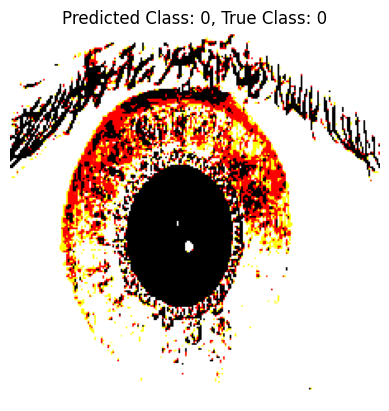

1/1 [==============================] - 0s 24ms/step


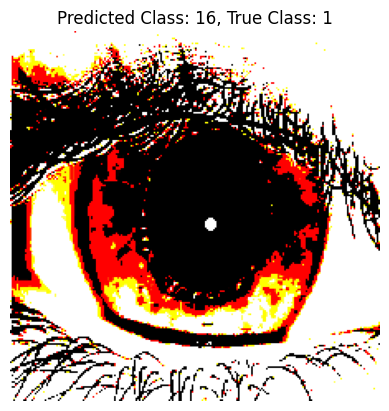

1/1 [==============================] - 0s 24ms/step


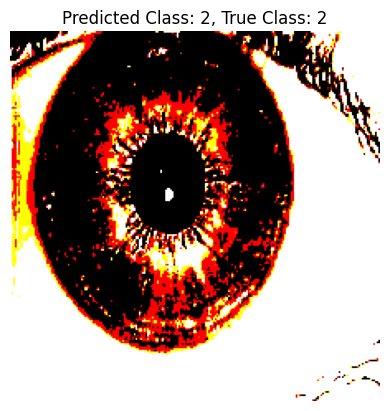

1/1 [==============================] - 0s 23ms/step


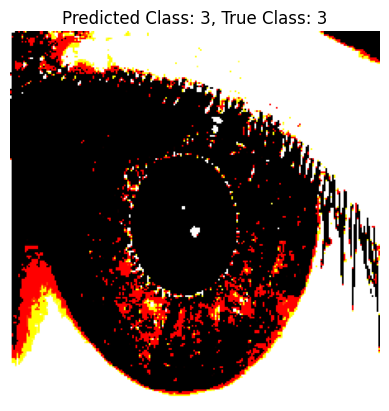

1/1 [==============================] - 0s 25ms/step


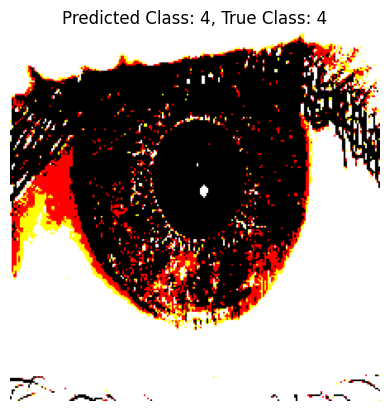

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = load_model('/content/drive/MyDrive/iris_dataset/ResNet50_Iris.h5')

# Path to the test directory
test_dir = "/content/drive/MyDrive/iris_dataset/test"

# Create a test generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest accuracy:", test_acc)

# Predict and display images along with labels
for i in range(5):
    x, y_true = test_generator[i]
    y_pred = model.predict(x)

    predicted_class = np.argmax(y_pred)
    true_class = np.argmax(y_true[0])

    plt.imshow(np.squeeze(x))
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}, True Class: {true_class}")
    plt.show()
